In [1]:
from langchain_core.messages import SystemMessage, HumanMessage, AIMessage
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Annotated
from langchain_ollama import ChatOllama

In [2]:
class AgentState(TypedDict):
    user_input: Annotated[HumanMessage, "Input from the user"]
    researcher_agent_response: Annotated[AIMessage,
                                         "Response from researcher agent"]
    summarizer_agent_response: Annotated[AIMessage,
                                         "Response from summarizer agent"]

In [3]:
llm1 = ChatOllama(model="gemma3:1b", temperature=0.7)
llm2 = ChatOllama(model="gemma3:1b", temperature=0)

In [4]:
# researcher agent node
def researcher_agent(state: AgentState) -> AgentState:
    system_prompt = SystemMessage(content="""
    You are a Expert Researcher with extensive knowledge in various fields. Given the user query, provide detailed information with relevant facts.
    answer the user question accurate and concisely.
    """)

    response = llm1.invoke([system_prompt, state['user_input']])

    state['researcher_agent_response'] = response
    return state

In [5]:
# summarizer agent node
def summarizer_agent(state: AgentState) -> AgentState:
    system_prompt = SystemMessage(content="""
    You are a Concise Summarizer with expertise in distilling complex information into clear and concise summaries in 200 words. Given detailed information from the researcher agent, provide a clear and concise summary in 200 words.
    """)

    # Pass the researcher's response content as a HumanMessage to the summarizer
    researcher_content = state['researcher_agent_response'].content
    response = llm2.invoke(
        [system_prompt, HumanMessage(content=researcher_content)])

    state['summarizer_agent_response'] = response
    return state

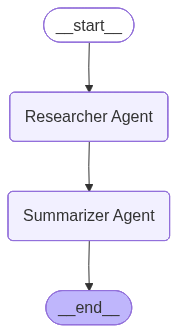

In [6]:
graph = StateGraph(AgentState)

graph.add_node("Researcher Agent", researcher_agent)
graph.add_node("Summarizer Agent", summarizer_agent)

graph.add_edge(START, "Researcher Agent")
graph.add_edge("Researcher Agent", "Summarizer Agent")
graph.add_edge("Summarizer Agent", END)

app = graph.compile()
app

In [7]:
user_input = "why human farts?"

result = app.invoke({
    "user_input": HumanMessage(content=user_input),
})

In [8]:
# print(result["researcher_agent_response"].content)

In [9]:
print(result["summarizer_agent_response"].content)

Okay, let’s focus on the relationship between diet and gas production. It’s a really fascinating area!  Let’s unpack how different food types significantly influence the types of gases produced in our farts.

**The Gut’s Gas Recipe: A Detailed Look at Dietary Impact**

The research shows a strong correlation between what we eat and the composition of our flatulence. It’s not just about *how many* gases are produced, but *which* gases are dominant. Here’s a breakdown:

**1. High-Fiber Powerhouses:** Foods rich in fiber, like beans, lentils, and vegetables, stimulate the gut bacteria to produce more hydrogen and methane. These gases are often the most abundant in flatulence.

**2. Protein-Rich Foods – A Nitrogenous Gas Hotspot:**  High-protein diets, particularly those containing animal products, lead to increased nitrogenous gases like ammonia and nitrites. This is a significant contributor to the characteristic smell.

**3. Fermented Foods – A Bacterial Buffet:** Foods like kimchi, sau